In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
from xhistogram.xarray import histogram
from dask.diagnostics import ProgressBar

# Looping Method

In [ ]:
# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})
land_area_adj = land_area_adj['land_area'].isel(ensemble=0)

region = 'India'
years = np.arange(2070,2101)
fracs = []
ds_area = mf.slice_region(land_area_adj,region)
total_area = ds_area.sum()

for year in years:
    ds = xr.open_dataset('../data/processed/WBTyearly/WBT'+str(year)+'.nc')
    ds_region = mf.slice_region(ds,region)
    
    ds_frac = (ds_region.sel(WBT_bin=slice(25,None)).sum(['ensemble','WBT_bin']))/1825
    ds_hot = np.isfinite(ds_frac.where(ds_frac>0.2,drop=True))
    frac = (ds_hot*ds_area).sum()/total_area
    
    # Add to array
    fracs.append(frac['histogram_WBT'].values.item())

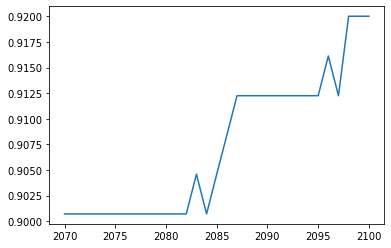

In [93]:
plt.plot(years,fracs)